In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import statistics
import scipy.stats as sp
from sklearn import linear_model

In [ ]:
!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

# Read the raw data

In [ ]:
url = 'https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'

In [ ]:
data_raw = pd.read_csv(url)
data_raw.shape

(65276, 25)

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# rename some clumns 
data_raw.rename(columns={'Perceived_Race':'race', 'Age_group__at_arrest_':'age_group', 'Youth_at_arrest__under_18_years':'youth'}, 
                inplace = True)

In [ ]:
data_raw.describe()

,Arrest_Year,EventID,ArrestID,PersonID,StripSearch,Booked,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
count,65276.000000,6.527600e+04,6.480700e+04,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,65276.000000,7801.000000,7801.000000,7801.000000,7801.000000,7801.000000,65276.000000
mean,2020.510096,1.029998e+06,6.032402e+06,318599.919695,0.119508,0.519502,0.004075,0.044136,0.038330,0.033381,0.006358,0.445937,0.765671,0.343161,0.453403,0.418921,0.373157,32638.500000
std,0.499902,1.731809e+04,1.870751e+04,10815.387928,0.324388,0.499623,0.063706,0.205398,0.191992,0.179632,0.079481,0.497072,0.423606,0.474795,0.497856,0.493414,0.483674,18843.702423
min,2020.000000,1.000000e+06,6.000000e+06,300000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2020.000000,1.015001e+06,6.016202e+06,309215.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16319.750000
50%,2021.000000,1.030006e+06,6.032402e+06,318595.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,32638.500000
75%,2021.000000,1.044996e+06,6.048602e+06,327926.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48957.250000
max,2021.000000,1.060002e+06,6.064804e+06,337346.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65276.000000


In [ ]:
categorical = data_raw.dtypes[data_raw.dtypes == "object"].index
print(categorical)

data_raw[categorical].describe()

Index(['Arrest_Month', 'race', 'Sex', 'age_group', 'youth', 'ArrestLocDiv',
       'Occurrence_Category'],
      dtype='object')


,Arrest_Month,race,Sex,age_group,youth,ArrestLocDiv,Occurrence_Category
count,65276,65272,65276,65252,65276,65276,65111
unique,4,8,3,9,3,18,31
top,Jan-Mar,White,M,Aged 25 to 34 years,Not a youth,XX,Assault
freq,17613,27723,52650,20949,62234,29646,7726


In [ ]:
data_raw.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
race                                   4
Sex                                    0
age_group                             24
youth                                  0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [ ]:
# inplace the missing value with unknown
data_raw['race'].fillna('Unknown or Legacy',inplace=True)
data_raw['age_group'].fillna('Unknown',inplace=True)
data_raw['Occurrence_Category'].fillna('Other Offence',inplace=True)

Accourding to the summary of the dataset: due to issues with the booking template, there may be some records where a person was strip searched, but the data does not indicate a booking (i.e., value = 0); in those cases, the user should presume a booking took place. Thus, we correct the value in column - booked. 

In [ ]:
data_raw['StripSearch'].value_counts(dropna=False)

0    57475
1     7801
Name: StripSearch, dtype: int64

In [ ]:
data_raw['Booked'].value_counts(dropna=False)

1    33911
0    31365
Name: Booked, dtype: int64

In [ ]:
data_raw.loc[data_raw.StripSearch==1, 'Booked'] = 1

In [ ]:
data_raw['Booked'].value_counts()

1    34483
0    30793
Name: Booked, dtype: int64

# **Preprocessing**

## unify the values in Categorical columns

In [ ]:
data_raw.Sex.value_counts(dropna=False)

M    52650
F    12617
U        9
Name: Sex, dtype: int64

### age group

In [ ]:
data_raw.age_group.value_counts(dropna=False).sort_index(ascending=True)

Aged 17 years and under       1361
Aged 17 years and younger     1681
Aged 18 to 24 years          10041
Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 65 and older              624
Aged 65 years and older        698
Unknown                         24
Name: age_group, dtype: int64

In [ ]:
# unify the name of values
data_raw.loc[data_raw['age_group']=='Aged 65 years and older', 'age_group'] = 65
data_raw.loc[data_raw['age_group']=='Aged 65 and older', 'age_group'] = 65
data_raw.loc[data_raw['age_group']=='Aged 55 to 64 years', 'age_group'] = 60 
data_raw.loc[data_raw['age_group']=='Aged 45 to 54 years', 'age_group']= 50
data_raw.loc[data_raw['age_group']=='Aged 35 to 44 years','age_group'] = 40
data_raw.loc[data_raw['age_group']=='Aged 25 to 34 years', 'age_group'] = 30
data_raw.loc[data_raw['age_group']=='Aged 18 to 24 years', 'age_group'] = 20
data_raw.loc[data_raw['age_group']=='Aged 17 years and under','age_group'] = 17
data_raw.loc[data_raw['age_group']=='Aged 17 years and younger', 'age_group'] = 17

In [ ]:
data_raw.age_group.value_counts(dropna=False)

30         20949
40         16242
20         10041
50          9066
60          4590
17          3042
65          1322
Unknown       24
Name: age_group, dtype: int64

### race

In [ ]:
data_raw.race.value_counts(dropna=False)

White                   27723
Black                   17526
Unknown or Legacy        5060
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: race, dtype: int64

In [ ]:
data_raw.loc[data_raw['race']=='East/Southeast Asian', 'race'] = 'Asian'
data_raw.loc[data_raw['race']=='South Asian', 'race'] = 'Asian'

In [ ]:
data_raw.race.value_counts()

White                27723
Black                17526
Asian                 8028
Unknown or Legacy     5060
Middle-Eastern        3237
Indigenous            1934
Latino                1768
Name: race, dtype: int64

### Occurrence_Category

In [ ]:
data_raw.Occurrence_Category.value_counts(ascending=True).sort_index(ascending=True)

Assault                                            7726
Assault & Other crimes against persons             7235
Break & Enter                                       916
Break and Enter                                     868
Crimes against Children                              69
Drug Related                                       2751
FTA/FTC, Compliance Check & Parollee               3877
FTA/FTC/Compliance Check/Parollee                  4246
Fraud                                               474
Harassment & Threatening                           1268
Harassment/Threatening                             1346
Homicide                                             73
Impaired                                           1362
LLA                                                 586
Mental Health                                       239
Mischief                                           1322
Mischief & Fraud                                   1732
Other Offence                                   

In [ ]:
data_raw.loc[data_raw['Occurrence_Category']=='Assault', 'Occurrence_Category'] = 'Assault & Other crimes against persons'

data_raw.loc[data_raw['Occurrence_Category']=='Break and Enter', 'Occurrence_Category'] = 'Break & Enter'

data_raw.loc[data_raw['Occurrence_Category']=='FTA/FTC/Compliance Check/Parollee', 'Occurrence_Category'] = 'FTA/FTC, Compliance Check & Parollee'

data_raw.loc[data_raw['Occurrence_Category']=='Harassment/Threatening', 'Occurrence_Category'] = 'Harassment & Threatening'

#data_raw.loc[data_raw['Occurrence_Category']=='Fraud', 'Occurrence_Category'] = 'Mischief & Fraud'
#data_raw.loc[data_raw['Occurrence_Category']=='Mischief', 'Occurrence_Category'] = 'Mischief & Fraud'

data_raw.loc[data_raw['Occurrence_Category']=='Robbery/Theft', 'Occurrence_Category'] = 'Robbery & Theft'

#data_raw.loc[data_raw['Occurrence_Category']=='Sexual Related Crime', 'Occurrence_Category'] = 'Sexual Related Crimes & Crimes Against Children'
#data_raw.loc[data_raw['Occurrence_Category']=='Crimes against Children', 'Occurrence_Category'] = 'Sexual Related Crimes & Crimes Against Children'

data_raw.loc[data_raw['Occurrence_Category']=='Other Statute', 'Occurrence_Category'] = 'Other Statute & Other Incident Type'
data_raw.loc[data_raw['Occurrence_Category']=='Other Offence', 'Occurrence_Category'] = 'Other Statute & Other Incident Type'

#data_raw.loc[data_raw['Occurrence_Category']=='Vehicle Related', 'Occurrence_Category'] = 'Vehicle Related (inc. Impaired)'
data_raw.loc[data_raw['Occurrence_Category']=='Impaired', 'Occurrence_Category'] = 'Vehicle Related (inc. Impaired)'

#data_raw.loc[data_raw['Occurrence_Category']=='Weapons', 'Occurrence_Category'] = 'Weapons & Homicide'
#data_raw.loc[data_raw['Occurrence_Category']=='Homicide', 'Occurrence_Category'] = 'Weapons & Homicide'


In [ ]:
data_raw.Occurrence_Category.value_counts(ascending=True).sort_index(ascending=True)

Assault & Other crimes against persons             14961
Break & Enter                                       1784
Crimes against Children                               69
Drug Related                                        2751
FTA/FTC, Compliance Check & Parollee                8123
Fraud                                                474
Harassment & Threatening                            2614
Homicide                                              73
LLA                                                  586
Mental Health                                        239
Mischief                                            1322
Mischief & Fraud                                    1732
Other Statute & Other Incident Type                 5425
Police Category - Administrative                    3888
Police Category - Incident                           564
Robbery & Theft                                     8334
Sexual Related Crime                                 839
Sexual Related Crimes & Crimes 

##generate the continous variable

In [ ]:
data_raw.shape

(65276, 25)

In [ ]:
data_raw.StripSearch.value_counts(ascending=True).sort_index(ascending=True)

0    57475
1     7801
Name: StripSearch, dtype: int64

## booked turnover ratio & stripsearch turnover ratio

In [ ]:
#caculate the number of strip search/custody/Arrest based on categorical variable
dr = data_raw.groupby(['Arrest_Year', 'Arrest_Month','Occurrence_Category','ArrestLocDiv','youth']).agg({
                                        'EventID':'count', 'StripSearch':'sum','Booked':'sum',
                                         })
       
dr.reset_index(inplace=True)
dr.head()

,Arrest_Year,Arrest_Month,Occurrence_Category,ArrestLocDiv,youth,EventID,StripSearch,Booked
0,2020,Apr-June,Assault & Other crimes against persons,11,Not a youth,52,7,35
1,2020,Apr-June,Assault & Other crimes against persons,11,Youth (aged 17 and younger),1,0,1
2,2020,Apr-June,Assault & Other crimes against persons,12,Not a youth,37,10,32
3,2020,Apr-June,Assault & Other crimes against persons,12,Youth (aged 17 and younger),1,0,0
4,2020,Apr-June,Assault & Other crimes against persons,13,Not a youth,25,2,16


In [ ]:
dr.shape

(2901, 8)

In [ ]:
# the possibility to be booked and be conducted stripsearch
b = dr.Booked/dr.EventID
s = dr.StripSearch/dr.EventID

In [ ]:
dr['bratio']=b
dr['sratio']=s
dr

,Arrest_Year,Arrest_Month,Occurrence_Category,ArrestLocDiv,youth,EventID,StripSearch,Booked,bratio,sratio
0,2020,Apr-June,Assault & Other crimes against persons,11,Not a youth,52,7,35,0.673077,0.134615
1,2020,Apr-June,Assault & Other crimes against persons,11,Youth (aged 17 and younger),1,0,1,1.000000,0.000000
2,2020,Apr-June,Assault & Other crimes against persons,12,Not a youth,37,10,32,0.864865,0.270270
3,2020,Apr-June,Assault & Other crimes against persons,12,Youth (aged 17 and younger),1,0,0,0.000000,0.000000
4,2020,Apr-June,Assault & Other crimes against persons,13,Not a youth,25,2,16,0.640000,0.080000
...,...,...,...,...,...,...,...,...,...,...
2896,2021,Oct-Dec,Weapons,54,Not a youth,4,0,4,1.000000,0.000000
2897,2021,Oct-Dec,Weapons,54,Youth (aged 17 years and under),1,0,1,1.000000,0.000000
2898,2021,Oct-Dec,Weapons,55,Not a youth,6,0,6,1.000000,0.000000
2899,2021,Oct-Dec,Weapons,XX,Not a youth,85,2,14,0.164706,0.023529


### merge to original dataset

In [ ]:
# add the ratio back to the raw dataset
dr = dr.drop(columns = ['EventID', 'StripSearch','Booked'])
dm = pd.merge(data_raw, dr, on=['Occurrence_Category','Arrest_Year','Arrest_Month','ArrestLocDiv','youth'])
dm

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,race,Sex,age_group,youth,ArrestLocDiv,...,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,bratio,sratio
0,2020,July-Sept,1005907,6017884.0,326622,White,M,40,Not a youth,54,...,0,1,NaN,NaN,NaN,NaN,NaN,1,0.888889,0.277778
1,2020,July-Sept,1014562,6056669.0,326622,White,M,40,Not a youth,54,...,0,0,NaN,NaN,NaN,NaN,NaN,2,0.888889,0.277778
2,2020,July-Sept,1033374,6006976.0,305822,White,F,50,Not a youth,54,...,0,0,NaN,NaN,NaN,NaN,NaN,3885,0.888889,0.277778
3,2020,July-Sept,1059895,6039534.0,315302,Black,M,40,Not a youth,54,...,0,0,0.0,0.0,0.0,0.0,0.0,5502,0.888889,0.277778
4,2020,July-Sept,1012603,6049272.0,324956,White,M,50,Not a youth,54,...,0,1,NaN,NaN,NaN,NaN,NaN,5859,0.888889,0.277778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1056854,6022804.0,305770,Asian,M,17,Youth (aged 17 years and under),11,...,0,0,NaN,NaN,NaN,NaN,NaN,64859,0.000000,0.000000
65272,2021,Oct-Dec,1001808,6001475.0,326400,White,M,17,Youth (aged 17 years and under),42,...,0,1,NaN,NaN,NaN,NaN,NaN,64864,1.000000,0.000000
65273,2021,Oct-Dec,1043675,6056606.0,315402,Asian,M,17,Youth (aged 17 years and under),33,...,0,0,NaN,NaN,NaN,NaN,NaN,64881,0.000000,0.000000
65274,2021,Oct-Dec,1043675,6061167.0,308546,White,M,17,Youth (aged 17 years and under),33,...,0,0,NaN,NaN,NaN,NaN,NaN,64883,0.000000,0.000000


In [ ]:
dm.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'race', 'Sex', 'age_group', 'youth', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId', 'bratio',
       'sratio'],
      dtype='object')

In [ ]:
dm.bratio.value_counts(dropna=False).sort_index(ascending=True)

0.000000     801
0.012500     160
0.012987     154
0.014599     137
0.020270     148
            ... 
0.979167      48
0.981818      55
0.983193     119
0.983607     122
1.000000    3700
Name: bratio, Length: 434, dtype: int64

In [ ]:
dm.sratio.value_counts(dropna=False).sort_index(ascending=True)

0.000000    17677
0.002169      461
0.002375      421
0.002475      404
0.002915      343
            ...  
0.950000       20
0.955882       68
0.962963       27
0.969697       33
1.000000      210
Name: sratio, Length: 378, dtype: int64

In [ ]:
dm.shape

(65276, 27)

In [ ]:
# we only condider someone are booked in the policy office
dataset = dm[dm.Booked != 0]
dataset.shape

(34483, 27)

In [ ]:
dataset_f = dm

In [ ]:
dataset_f.shape

(65276, 27)

# **EDA**

## Data_raw

In [ ]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   race                             65276 non-null  object 
 6   Sex                              65276 non-null  object 
 7   age_group                        65276 non-null  object 
 8   youth                            65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

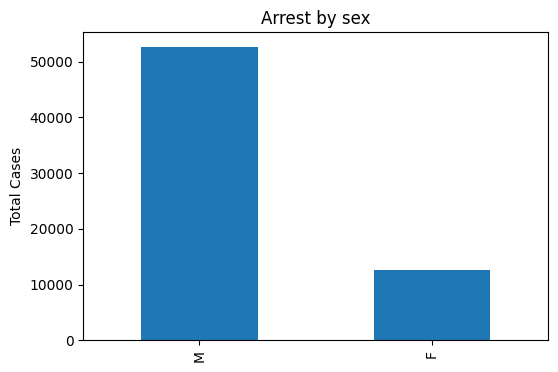

In [ ]:
data_raw_gender = data_raw[data_raw.Sex !='U']
arrest_gender = data_raw_gender.Sex.value_counts()

fig = plt.figure(figsize=(6,4))
arrest_gender.plot(kind='bar')

plt.title('Arrest by sex')
plt.ylabel('Total Cases')

plt.show()

<Axes: xlabel='StripSearch', ylabel='count'>

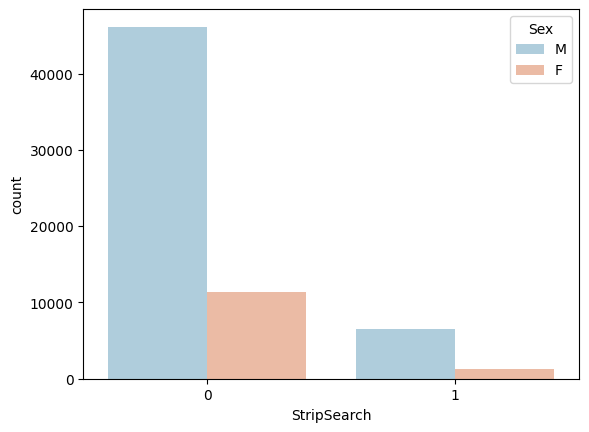

In [ ]:
data_raw_gender = data_raw[data_raw.Sex !='U']
sns.countplot(x='StripSearch', hue='Sex', data = data_raw_gender, palette='RdBu_r')

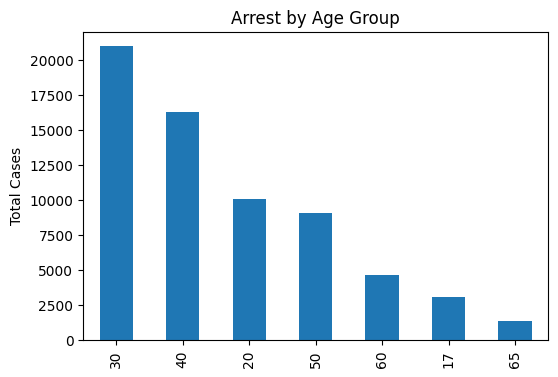

In [ ]:
data_raw_age = data_raw[data_raw.age_group !='Unknown'] 
arrest_age = data_raw_age.age_group.value_counts()

fig = plt.figure(figsize=(6,4))
arrest_age.plot(kind='bar')

plt.title('Arrest by Age Group')
plt.ylabel('Total Cases')

plt.show()

<Axes: xlabel='StripSearch', ylabel='count'>

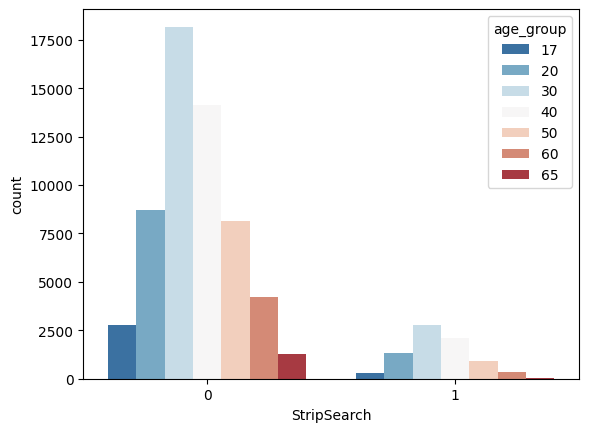

In [ ]:
sns.countplot(x='StripSearch', hue='age_group', data = data_raw_age, palette='RdBu_r')

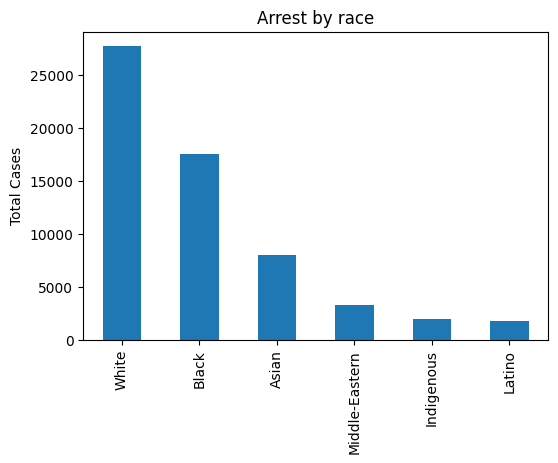

In [ ]:
data_raw_race = data_raw[data_raw.race !='Unknown or Legacy']
arrest_race = data_raw_race.race.value_counts()

fig = plt.figure(figsize=(6,4))
arrest_race.plot(kind='bar')

plt.title('Arrest by race')
plt.ylabel('Total Cases')

plt.show()

<Axes: xlabel='StripSearch', ylabel='count'>

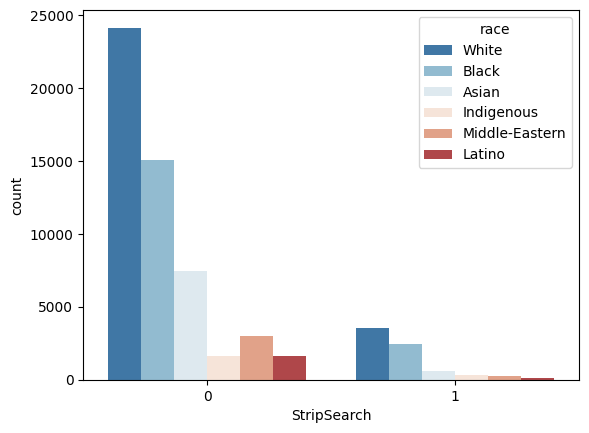

In [ ]:
sns.countplot(x='StripSearch', hue='race', data = data_raw_race, palette='RdBu_r')

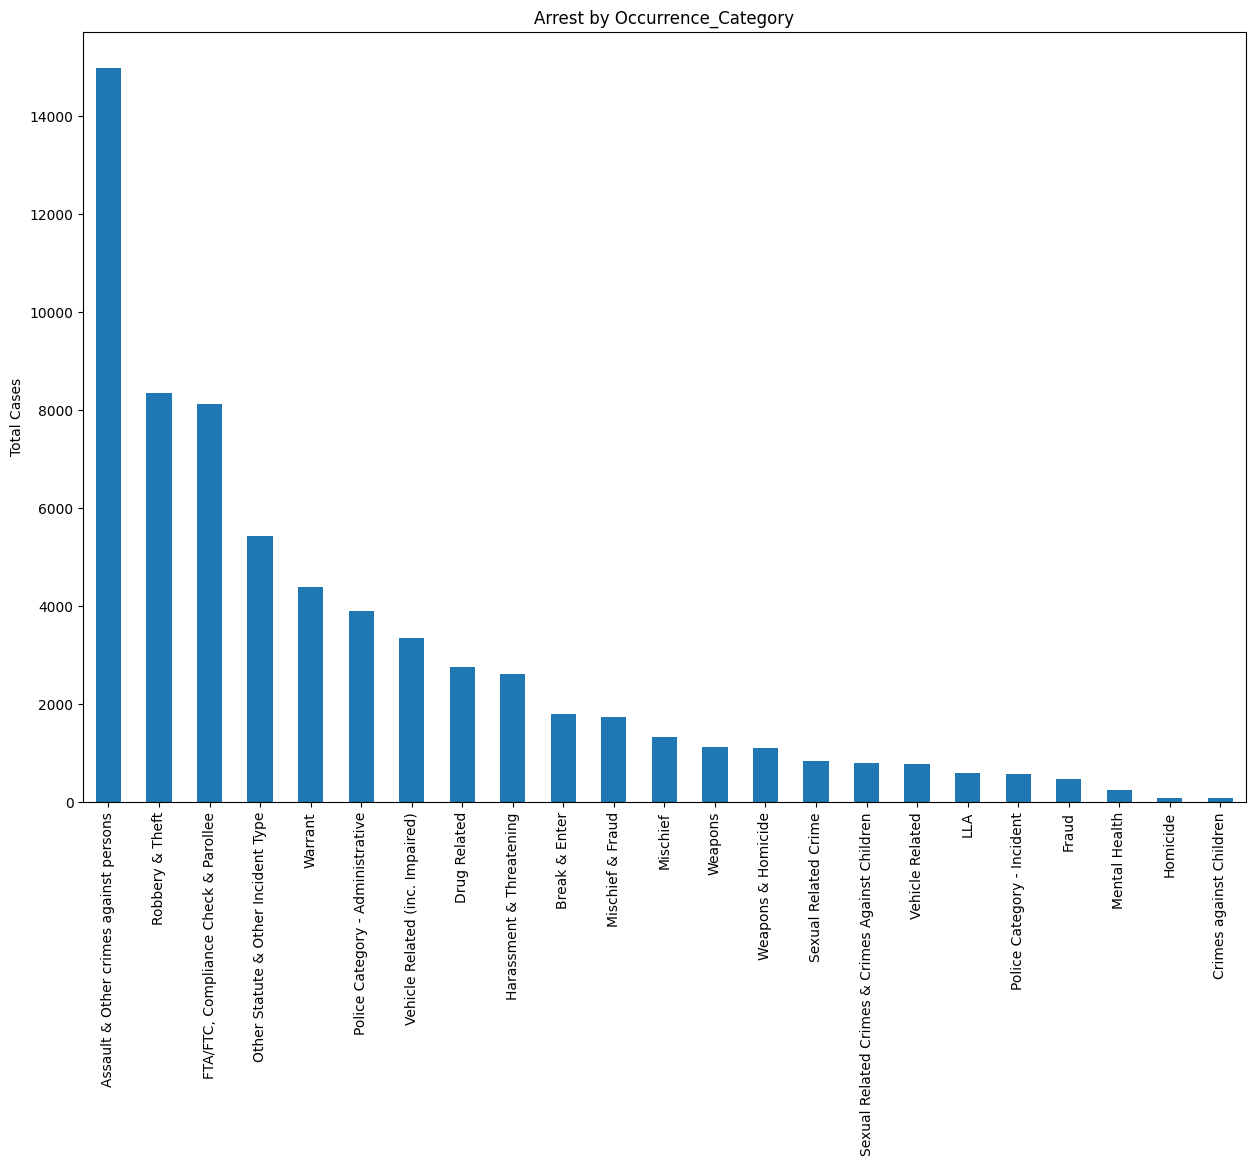

In [ ]:
data_Occ = data_raw.Occurrence_Category.value_counts()

fig = plt.figure(figsize=(15,10))
data_Occ.plot(kind='bar')

plt.title('Arrest by Occurrence_Category')
plt.ylabel('Total Cases')

plt.show()

Multivariate

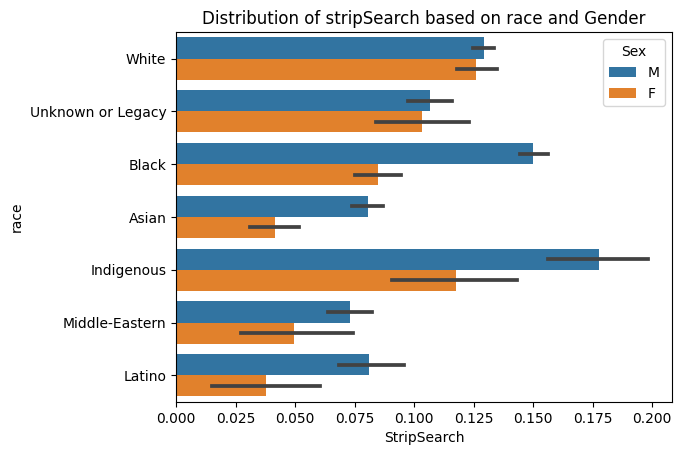

In [ ]:
sns.barplot(x="StripSearch", y="race", data= data_raw_gender,hue = "Sex")
plt.title("Distribution of stripSearch based on race and Gender")
plt.show()

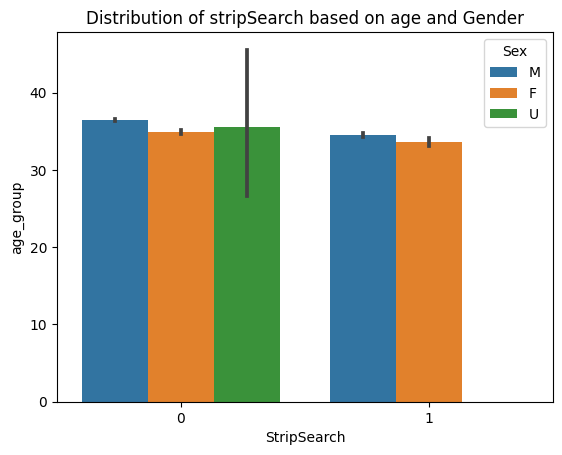

In [ ]:
sns.barplot(x="StripSearch", y="age_group", data= data_raw_age, hue = 'Sex')
plt.title("Distribution of stripSearch based on age and Gender")
plt.show()

## **Dataset**

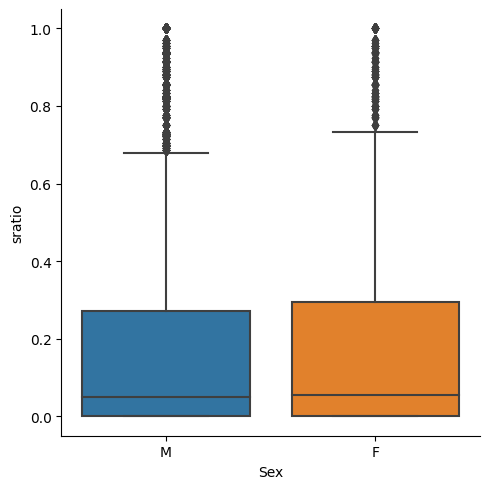

In [ ]:
dataset_s = dataset[dataset.Sex !='U']
sns.catplot(x='Sex', 
            y='sratio',
            data=dataset_s,
            kind='box')

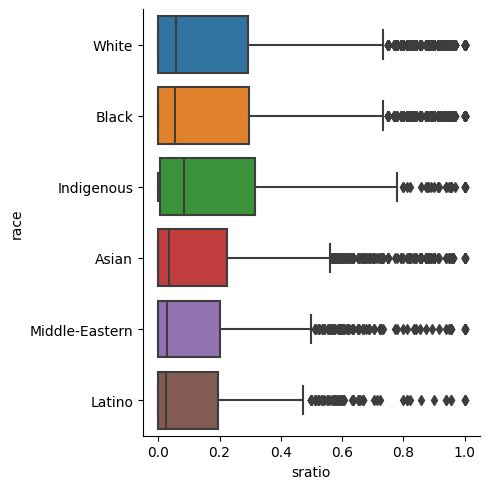

In [ ]:
dataset_r = dataset[dataset.race !='Unknown or Legacy']
sns.catplot(x='sratio', 
            y='race',
            data=dataset_r,
            kind='box')

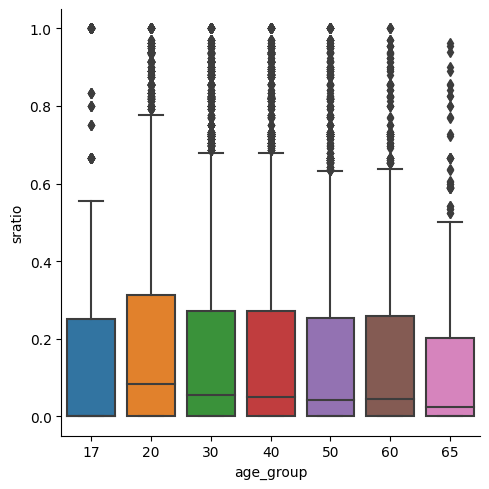

In [ ]:
dataset_a = dataset[dataset.age_group !='Unknown']
sns.catplot(x='age_group', 
            y='sratio',
            data = dataset_a,
            kind='box')

bratio & sratio

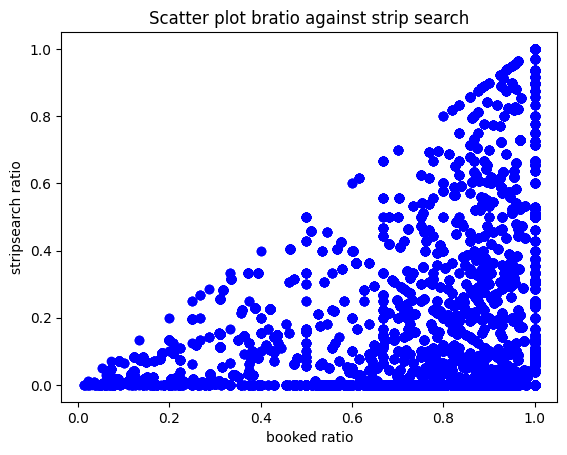

In [ ]:
plt.scatter(dataset['bratio'], dataset['sratio'], color='blue')

plt.xlabel("booked ratio")
plt.ylabel("stripsearch ratio")
plt.title("Scatter plot bratio against strip search")
plt.show()

Logistic EDA

<Axes: xlabel='ItemsFound', ylabel='count'>

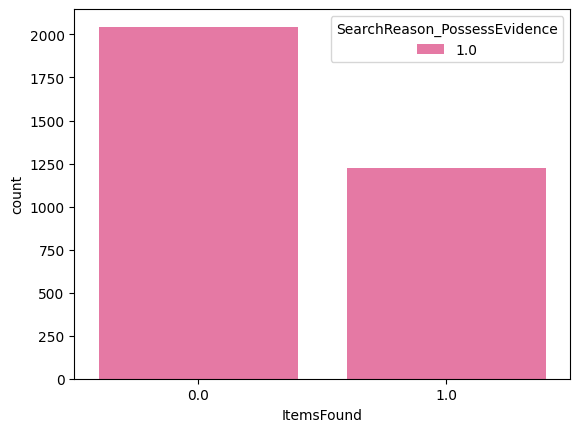

In [ ]:
data_PE = data_raw[data_raw['SearchReason_PossessEvidence']==1]
sns.countplot(x='ItemsFound', hue='SearchReason_PossessEvidence', data = data_PE, palette="RdPu")

<Axes: xlabel='ItemsFound', ylabel='count'>

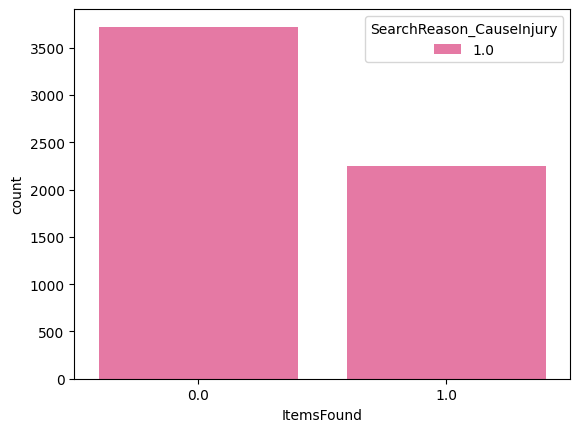

In [ ]:
data_CI = data_raw[data_raw['SearchReason_CauseInjury']==1]
sns.countplot(x='ItemsFound', hue='SearchReason_CauseInjury', data = data_CI, palette="RdPu")

<Axes: xlabel='ItemsFound', ylabel='count'>

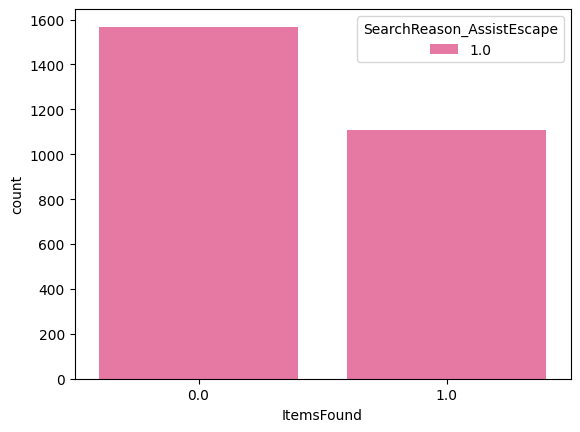

In [ ]:
data_AE = data_raw[data_raw['SearchReason_AssistEscape']==1]
sns.countplot(x='ItemsFound', hue='SearchReason_AssistEscape', data = data_AE, palette="RdPu")

<Axes: xlabel='ItemsFound', ylabel='count'>

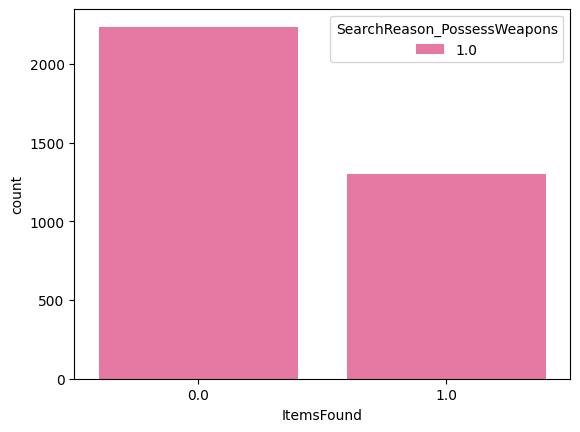

In [ ]:
data_AE = data_raw[data_raw['SearchReason_PossessWeapons']==1]
sns.countplot(x='ItemsFound', hue='SearchReason_PossessWeapons', data = data_AE, palette="RdPu")

# T tests

In [ ]:
import statsmodels.stats.api as sms

In [ ]:
#degrees of freedom code for Welch test 
#code from https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/ (values checked against R output)

def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

### Gender

In [ ]:
##Conduct Gender t-test (male, female)##
Male = dataset[dataset['Sex']=='M']
Female = dataset[dataset['Sex']=='F']

StripSearch_male = Male['sratio']
StripSearch_female = Female['sratio']

#conduct ttest
print('Ttest results for gender:',stats.ttest_ind(StripSearch_male, StripSearch_female, equal_var=False)) 

Ttest results for gender: Ttest_indResult(statistic=-3.104562044871593, pvalue=0.0019124949140022513)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean ratio of stripsearch, Male, Female:',StripSearch_male.mean(), StripSearch_female.mean())
print('Standard deviation for ratio, Male, Female:',StripSearch_male.std(), StripSearch_female.std())

Mean ratio of stripsearch, Male, Female: 0.17080043897181657 0.1817130278713092
Standard deviation for ratio, Male, Female: 0.23381884011893433 0.24167641317185246


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_male), sms.DescrStatsW(StripSearch_female))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (-0.017802974479551863, -0.0040222033194336)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_male, StripSearch_female))

DOF for ratio: 7732.702810985926


### Age_group

In [ ]:
dataset.age_group.value_counts(dropna=False)

30         11687
40          8879
20          5327
50          4701
60          2135
17          1252
65           496
Unknown        6
Name: age_group, dtype: int64

In [ ]:
df_age = dataset[dataset.age_group != 'Unknown']

In [ ]:
df_age.age_group.value_counts(dropna=False)

30    11687
40     8879
20     5327
50     4701
60     2135
17     1252
65      496
Name: age_group, dtype: int64

20 vs other age

In [ ]:
# compare adult gorup to other groups
Adult_20s = df_age[df_age['age_group']== 20 ]
other_age1 = df_age[df_age['age_group']!= 20]

StripSearch_Adult_20s = Adult_20s['sratio']
StripSearch_other_age1 = other_age1['sratio']

#conduct ttest
print('Ttest results for youth:',stats.ttest_ind(StripSearch_Adult_20s, StripSearch_other_age1, equal_var=False))

Ttest results for youth: Ttest_indResult(statistic=6.6397105145072945, pvalue=3.373755808931861e-11)


In [ ]:
print('Mean stripsearch, youth, adult :',StripSearch_Adult_20s.mean(), StripSearch_other_age1.mean())
print('Standard deviation for stripsearch, youth, adult:',StripSearch_Adult_20s.std(), StripSearch_other_age1.std())

Mean stripsearch, youth, adult : 0.19312764019721956 0.1688038777841532
Standard deviation for stripsearch, youth, adult: 0.24821834780357463 0.23249146511647126


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_Adult_20s), sms.DescrStatsW(StripSearch_other_age1))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.017142457685882562, 0.031505067140250434)


In [ ]:
print('DOF for ratio:', welch_dof(StripSearch_Adult_20s, StripSearch_other_age1))

DOF for ratio: 7137.114270787643


30 vs other age

In [ ]:
# compare Young adult gorup to other groups
adult_30s = dataset[dataset['age_group']==30]
other_age2 = dataset[dataset['age_group']!=30]

StripSearch_adult_30s = adult_30s['sratio']
StripSearch_other_age2 = other_age2['sratio']

#conduct ttest
print('Ttest results for youth:',stats.ttest_ind(StripSearch_adult_30s, StripSearch_other_age2, equal_var=False))

Ttest results for youth: Ttest_indResult(statistic=-0.13211902371010242, pvalue=0.8948912515875809)


In [ ]:
print('Mean stripsearch, youth, adult :',StripSearch_adult_30s.mean(), StripSearch_other_age2.mean())
print('Standard deviation for stripsearch, youth, adult:',StripSearch_adult_30s.std(), StripSearch_other_age2.std())

Mean stripsearch, youth, adult : 0.1723289347375003 0.172679432238592
Standard deviation for stripsearch, youth, adult: 0.2311099451560687 0.2371760207111017


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_adult_30s),sms.DescrStatsW(StripSearch_other_age2))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (-0.00555033132638395, 0.00484933632420077)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_other_age2, StripSearch_adult_30s))

DOF for ratio: 24109.15683428077


### Race

In [ ]:
dataset.race.value_counts(dropna=False)

White                14535
Black                 9835
Asian                 3899
Unknown or Legacy     2491
Middle-Eastern        1649
Indigenous            1100
Latino                 974
Name: race, dtype: int64

In [ ]:
df_race = dataset[dataset.race!= 'Unknown or Legacy']

In [ ]:
df_race.race.value_counts()

White             14535
Black              9835
Asian              3899
Middle-Eastern     1649
Indigenous         1100
Latino              974
Name: race, dtype: int64

White vs other race

In [ ]:
# compare white people with other race
White = df_race[df_race['race']=='White']
other_race = df_race[df_race['race'] != 'White']

StripSearch_White = White['sratio']
StripSearch_other_race = other_race['sratio']
print('Ttest results for White and Black:',stats.ttest_ind(StripSearch_White, StripSearch_other_race, equal_var=False))

Ttest results for White and Black: Ttest_indResult(statistic=5.411599455941785, pvalue=6.293390595395593e-08)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean stripsearch, White, Black:', StripSearch_White.mean(),StripSearch_other_race.mean())
print('Standard deviation for stripsearch, White, Black:', StripSearch_White.std(),StripSearch_other_race.std())

Mean stripsearch, White, Black: 0.18046893710428838 0.1661286604918178
Standard deviation for stripsearch, White, Black: 0.23971637957262323 0.23144729694851696


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_White), sms.DescrStatsW(StripSearch_other_race))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.009146333480924404, 0.01953421974401677)


In [ ]:
print('DOF for ratio:',welch_dof(StripSearch_White, StripSearch_other_race))

DOF for ratio: 30535.184813598982


White vs Black

In [ ]:
# compare white people with black people
White = df_race[df_race['race']=='White']
Black = df_race[df_race['race'] == 'Black']

StripSearch_White = White['sratio']
StripSearch_Black = Black['sratio']
print('Ttest results for White and Black:',stats.ttest_ind(StripSearch_White, StripSearch_Black, equal_var=False))

Ttest results for White and Black: Ttest_indResult(statistic=-0.5455097124403893, pvalue=0.5854088576740869)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean stripsearch, White, Black:', StripSearch_White.mean(),StripSearch_Black.mean())
print('Standard deviation for stripsearch, White, Black:', StripSearch_White.std(),StripSearch_Black.std())

Mean stripsearch, White, Black: 0.18046893710428838 0.18220005431378247
Standard deviation for stripsearch, White, Black: 0.23971637957262323 0.2452755974010963


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_White), sms.DescrStatsW(StripSearch_other_race))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.009146333480924404, 0.01953421974401677)


## Bratio

In [ ]:
bavg = dataset['bratio'].mean()

In [ ]:
High = dataset[dataset['bratio'] > bavg]
Low = dataset[dataset['bratio'] <= bavg]

StripSearch_high = High['sratio']
StripSearch_low = Low['sratio']
print('Ttest results for White and Black:',stats.ttest_ind(StripSearch_high, StripSearch_low, equal_var=False))

Ttest results for White and Black: Ttest_indResult(statistic=60.618586437713745, pvalue=0.0)


In [ ]:
#calculate mean and standard deviation of groups 
print('Mean stripsearch, high bratio, low bratio:', StripSearch_high.mean(), StripSearch_low.mean())
print('Standard deviation for stripsearch, high bratio, low bratio:', StripSearch_high.std(),StripSearch_low.std())

Mean stripsearch, high bratio, low bratio: 0.21749295055303783 0.0884622363348254
Standard deviation for stripsearch, high bratio, low bratio: 0.26443066205893223 0.13056363934898776


In [ ]:
# compute confidence interval 
import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(StripSearch_high), sms.DescrStatsW(StripSearch_low))
print('Confidence interval for ratio:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for ratio: (0.12485865259830893, 0.13320277583811582)


# One Way ANOVA

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

## Age Group

In [ ]:
# Model formula
age_model = ols('sratio ~ age_group',                 
            data = df_age).fit()
                
age_anova_result = sm.stats.anova_lm(age_model, typ=2)
print (age_anova_result)

                sum_sq       df          F        PR(>F)
age_group     3.790617      6.0  11.446017  7.873327e-13
Residual   1902.591429  34470.0        NaN           NaN


In [ ]:
# perform Tukey's test
race_tukey = pairwise_tukeyhsd(endog= df_age['sratio'],
                          groups = df_age['age_group'],
                          alpha=0.05)

#display results
print(race_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    17     20   0.0257 0.0091  0.0039  0.0474   True
    17     30   0.0049 0.9928 -0.0157  0.0255  False
    17     40   0.0038 0.9984 -0.0171  0.0247  False
    17     50  -0.0049 0.9946  -0.027  0.0171  False
    17     60   -0.005  0.997 -0.0296  0.0197  False
    17     65   -0.035  0.074 -0.0718  0.0018  False
    20     30  -0.0208    0.0 -0.0323 -0.0093   True
    20     40  -0.0219    0.0 -0.0339 -0.0099   True
    20     50  -0.0306    0.0 -0.0445 -0.0167   True
    20     60  -0.0306    0.0 -0.0484 -0.0129   True
    20     65  -0.0607    0.0 -0.0932 -0.0282   True
    30     40  -0.0011 0.9999 -0.0109  0.0087  False
    30     50  -0.0098 0.1907 -0.0218  0.0022  False
    30     60  -0.0098 0.5627 -0.0261  0.0065  False
    30     65  -0.0399  0.004 -0.0716 -0.0081   True
    40     50  -0.0087 0.3791 -0.0212  0.0038 

## Race

In [ ]:
# Model formula
race_model = ols('sratio ~ race',                 
            data = df_race).fit()
                
race_anova_result = sm.stats.anova_lm(race_model, typ=2)
print (race_anova_result)

               sum_sq       df          F        PR(>F)
race        10.658325      5.0  38.713443  8.953346e-40
Residual  1761.234046  31986.0        NaN           NaN


In [ ]:
# perform Tukey's test
race_tukey = pairwise_tukeyhsd(endog= df_race['sratio'],
                          groups=df_race['race'],
                          alpha=0.05)

#display results
print(race_tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
         Asian          Black   0.0384    0.0  0.0258  0.0511   True
         Asian     Indigenous   0.0484    0.0  0.0255  0.0712   True
         Asian         Latino  -0.0192 0.2013 -0.0431  0.0048  False
         Asian Middle-Eastern  -0.0134 0.3713 -0.0331  0.0062  False
         Asian          White   0.0367    0.0  0.0246  0.0488   True
         Black     Indigenous   0.0099 0.7676 -0.0113  0.0312  False
         Black         Latino  -0.0576    0.0 -0.0801 -0.0351   True
         Black Middle-Eastern  -0.0519    0.0 -0.0697 -0.0341   True
         Black          White  -0.0017 0.9932 -0.0105   0.007  False
    Indigenous         Latino  -0.0675    0.0  -0.097 -0.0381   True
    Indigenous Middle-Eastern  -0.0618    0.0 -0.0878 -0.0358   True
    Indigenous          White  -0.

# Two-Way ANOVA

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as mc

Tukey Test after Two-Way ANOVA

## Race & age

In [ ]:
df_age_race = dataset[dataset.age_group != 'Unknown']
df_age_race = df_age_race[df_age_race.race != 'Unknown or Legacy']

In [ ]:
df_age_race.groupby('age_group')['race'].value_counts(dropna=False)

age_group  race          
17         Black              638
           White              314
           Asian               91
           Middle-Eastern      79
           Latino              32
           Indigenous          11
20         Black             2189
           White             1348
           Asian              707
           Middle-Eastern     362
           Latino             164
           Indigenous         136
30         White             4583
           Black             3693
           Asian             1214
           Middle-Eastern     519
           Indigenous         415
           Latino             357
40         White             4305
           Black             2045
           Asian              986
           Middle-Eastern     371
           Indigenous         321
           Latino             256
50         White             2509
           Black              883
           Asian              530
           Middle-Eastern     219
           Indigenous 

In [ ]:
model = ols('sratio ~ C(age_group) + C(race) + C(race):C(age_group)', data = df_age_race ).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age_group),4.088465,6.0,12.409966,5.154746e-14
C(race),11.195307,5.0,40.778151,5.722391e-42
C(race):C(age_group),3.087901,30.0,1.874579,2.580896e-03
Residual,1753.992568,31944.0,NaN,NaN


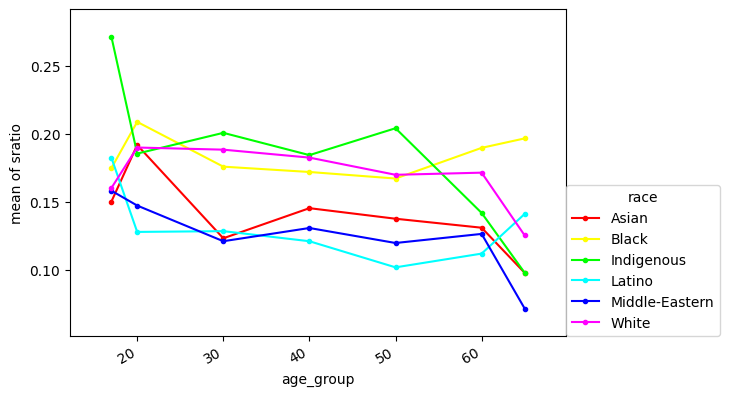

In [ ]:
#plot an interaction plot 
fig = interaction_plot(x=df_age_race['age_group'], trace=df_age_race['race'], response=df_age_race['sratio'], legendloc = [1,0])
#x axis(age_group), trace (race), dependent variable (ratio)
fig.autofmt_xdate()
plt.show()

Tukey Test after Two-Way ANOVA

In [ ]:
tukey_results = pairwise_tukeyhsd(df_age_race['sratio'], df_age_race['age_group'].astype(str) + df_age_race['race'])
print(tukey_results)

/usr/local/lib/python3.9/dist-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
         17Asian          17Black   0.0247    1.0  -0.078  0.1274  False
         17Asian     17Indigenous   0.1218    1.0 -0.1707  0.4144  False
         17Asian         17Latino   0.0325    1.0 -0.1559  0.2208  False
         17Asian 17Middle-Eastern   0.0081    1.0 -0.1329   0.149  False
         17Asian          17White     0.01    1.0 -0.0991  0.1191  False
         17Asian          20Asian   0.0418    1.0 -0.0603  0.1439  False
         17Asian          20Black   0.0589 0.9562 -0.0392  0.1569  False
         17Asian     20Indigenous   0.0355    1.0 -0.0887  0.1596  False
         17Asian         20Latino  -0.0224    1.0 -0.1422  0.0974  False
         17Asian 20Middle-Eastern  -0.0029    1.0 -0.1104  0.1046  False
         17Asian          20White   0.0399    1.0 -

# Power Analysis for race ancova

In [ ]:
dataset_f.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,race,Sex,age_group,youth,ArrestLocDiv,...,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,bratio,sratio
0,2020,July-Sept,1005907,6017884.0,326622,White,M,40,Not a youth,54,...,0,1,NaN,NaN,NaN,NaN,NaN,1,0.888889,0.277778
1,2020,July-Sept,1014562,6056669.0,326622,White,M,40,Not a youth,54,...,0,0,NaN,NaN,NaN,NaN,NaN,2,0.888889,0.277778
2,2020,July-Sept,1033374,6006976.0,305822,White,F,50,Not a youth,54,...,0,0,NaN,NaN,NaN,NaN,NaN,3885,0.888889,0.277778
3,2020,July-Sept,1059895,6039534.0,315302,Black,M,40,Not a youth,54,...,0,0,0.0,0.0,0.0,0.0,0.0,5502,0.888889,0.277778
4,2020,July-Sept,1012603,6049272.0,324956,White,M,50,Not a youth,54,...,0,1,NaN,NaN,NaN,NaN,NaN,5859,0.888889,0.277778


In [ ]:
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
w = dataset_f[dataset_f['race'] == 'White']
c = dataset_f[dataset_f['race'] != 'White']

w_s = w['sratio']
c_s = c['sratio']

In [ ]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(w_s, c_s)
alpha = 0.05
power = 0.8
ratio = len(c_s)/len(w_s) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for strip search ratio:',effect_size)

Effect size (Cohen's D) for strip search ratio: 0.03744848723976445


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for race_white') 
print('Actual size of white people:', len(w_s))
nobs2 =ratio*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for race_color')
print('Actual size of color people:', len(c_s))

Sample Size of nobs1: 9729.340 needed for race_white
Actual size of white people: 27723
Sample Size of nobs2: 13179.161 needed for race_color
Actual size of color people: 37553


In [ ]:
from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs = 27723, effect_size = effect_size, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


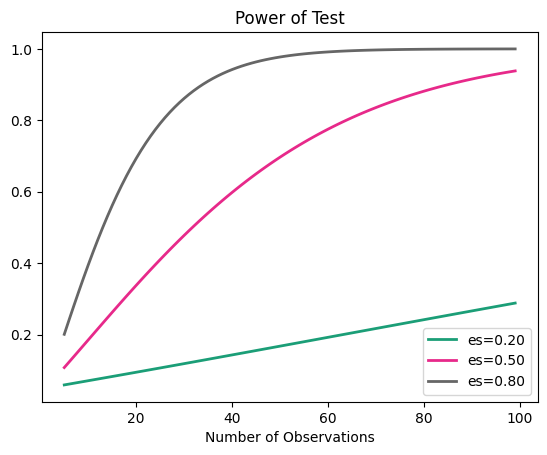

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

# ANCOVA

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=aa88ab37172eb4b48cb30e3243d82a8324cee2e65aa8e125351763a3a8a5f530
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:
from pingouin import ancova
pd.options.display.max_columns = None #show all columns in data

In [ ]:
#isolate columns of interest into a new df
dataset_ancova = dataset_f[['race', 'bratio', 'sratio']].copy()

dataset_ancova

,race,bratio,sratio
0,White,0.888889,0.277778
1,White,0.888889,0.277778
2,White,0.888889,0.277778
3,Black,0.888889,0.277778
4,White,0.888889,0.277778
...,...,...,...
65271,Asian,0.000000,0.000000
65272,White,1.000000,0.000000
65273,Asian,0.000000,0.000000
65274,White,0.000000,0.000000


In [ ]:
#inspect the data is stored correctly in the df
dataset_ancova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65276 entries, 0 to 65275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   race    65276 non-null  object 
 1   bratio  65276 non-null  float64
 2   sratio  65276 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
#what is the conditional proability of predicitng y = p(x_1|x_2)
ancova(data=dataset_ancova, dv='sratio', covar='bratio', between='race')

,Source,SS,DF,F,p-unc,np2
0,race,7.497478,6,39.718278,1.589692e-48,0.003638
1,bratio,432.051047,1,13732.876062,0.000000e+00,0.173832
2,Residual,2053.401459,65268,NaN,NaN,NaN


# Power Analysis for logitic

In [ ]:
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [ ]:
avg = dataset['sratio'].mean()

In [ ]:
itf = dataset[dataset['sratio'] > avg]
inf = dataset[dataset['sratio']<= avg]

itf_1 = itf['ItemsFound']
inf_0 = inf['ItemsFound']

In [ ]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(itf_1, inf_0)
alpha = 0.05
power = 0.8
ratio = len(inf_0)/len(itf_1) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for period 3 grades:',effect_size)

Effect size (Cohen's D) for period 3 grades: 0.31390128043999294


In [ ]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for high sratio') 
print('Actual size of high sratio:', len(itf_1))
nobs2 =ratio*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for low sratio')
print('Actual size of low sratio:', len(inf_0))

Sample Size of nobs1: 120.084 needed for high sratio
Actual size of high sratio: 11486
Sample Size of nobs2: 240.430 needed for low sratio
Actual size of low sratio: 22997


In [ ]:
from statsmodels.stats.power import TTestPower

power = TTestPower()
n_test = power.solve_power(nobs = 11486, effect_size = 0.31390128043999294, power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 1.000


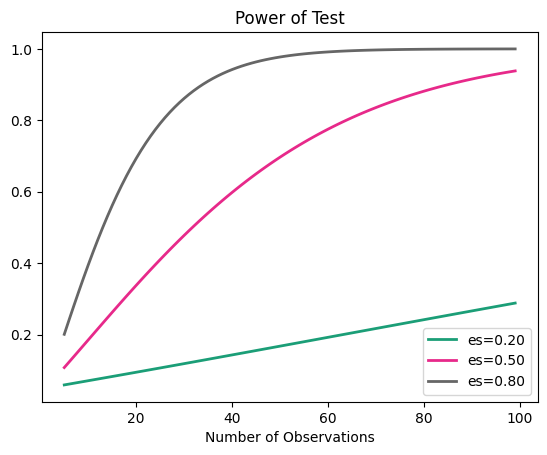

In [ ]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
pd.options.display.max_columns = None #show all columns in data

In [ ]:
dm.shape

(65276, 27)

In [ ]:
data_log = dm.dropna(subset=['ItemsFound'])

In [ ]:
# select the strip search reason to identify
x = data_log[['sratio','SearchReason_CauseInjury','SearchReason_AssistEscape', 'SearchReason_PossessWeapons', 'SearchReason_PossessEvidence']].copy()

#x[''] = pd.get_dummies(df., drop_first=True)

# Select the response column 
y = data_log['ItemsFound']

In [ ]:
y.unique()

array([0., 1.])

Train test split

In [ ]:
# Split these data into training and testing datasets
#set random seed for replicability 
#you may want to consider stratifying your train test split (creates splits by preserving the same percentage for each target class as in the complete set.)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [ ]:
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("\n========== Training data ==========")
display(y_train.describe().T)
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("\n========== Test data ==========")
display(y_test.describe().T)

X_train shape: (6240, 5)
y_train shape: (6240,)

========== Training data ==========


count    6240.000000
mean        0.373237
std         0.483703
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ItemsFound, dtype: float64

X_test shape: (1561, 5)
y_test shape: (1561,)

========== Test data ==========


count    1561.000000
mean        0.372838
std         0.483714
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: ItemsFound, dtype: float64

Logistic regression model

In [ ]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = " ItemsFound ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:   ItemsFound ~ sratio + SearchReason_CauseInjury + SearchReason_AssistEscape + SearchReason_PossessWeapons + SearchReason_PossessEvidence 

Optimization terminated successfully.
         Current function value: 0.647794
         Iterations 5


In [ ]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             ItemsFound   No. Observations:                 6240
Model:                          Logit   Df Residuals:                     6234
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 0.01947
Time:                        18:54:25   Log-Likelihood:                -4042.2
converged:                       True   LL-Null:                       -4122.5
Covariance Type:            nonrobust   LLR p-value:                 7.662e-33
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -1.0389      0.075    -13.788      0.000      -1.187      -0.891
sratio                           1.1190      0.100     11.155      0.000       0.922       1.316
SearchReason_CauseInjury        -0.0350      0.068     -0.517      0.605      -0.168       0.098
SearchReason_AssistEscape        0.3471      0.062      5.589      0.000       0.225       0.469
SearchReason_PossessWeapons     -0.0948      0.057     -1.663      0.096      -0.206       0.017
SearchReason_PossessEvidence    -0.0892      0.056     -1.587      0.113      -0.199       0.021
================================================================================================
"""

In [ ]:
#getting odds ratio 
np.exp(log_reg_1.params)

Intercept                       0.353830
sratio                          3.061876
SearchReason_CauseInjury        0.965610
SearchReason_AssistEscape       1.414984
SearchReason_PossessWeapons     0.909583
SearchReason_PossessEvidence    0.914697
dtype: float64

In [ ]:
params = log_reg_1.params
conf = log_reg_1.conf_int()
conf['OR'] = params
conf.columns = ["Lower CI", "Upper CI", "OR"]
np.exp(conf)

,Lower CI,Upper CI,OR
Intercept,0.305252,0.410140,0.353830
sratio,2.515331,3.727178,3.061876
SearchReason_CauseInjury,0.845600,1.102652,0.965610
SearchReason_AssistEscape,1.252805,1.598158,1.414984
SearchReason_PossessWeapons,0.813469,1.017054,0.909583
SearchReason_PossessEvidence,0.819306,1.021194,0.914697


**assess the model**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
pred_1 = log_reg_1.predict(x_test)
# round() rounds to nearest integer;
# 0.5 rounds to 0; 0.501 rounds to 1
prediction_1 = list(map(round, pred_1))

In [ ]:
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, prediction_1))


Test accuracy =  0.6348494554772581


## confusion matrix for the logistic regression model

In [ ]:
# Confusion matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#C0,0 is true negative, C1,0 is false negative, C1,1 is true positive, C0,1 false positive 

cm = confusion_matrix(y_test, prediction_1) 
print ("\nConfusion Matrix : \n", cm) 


Confusion Matrix : 
 [[931  48]
 [522  60]]


<Axes: >

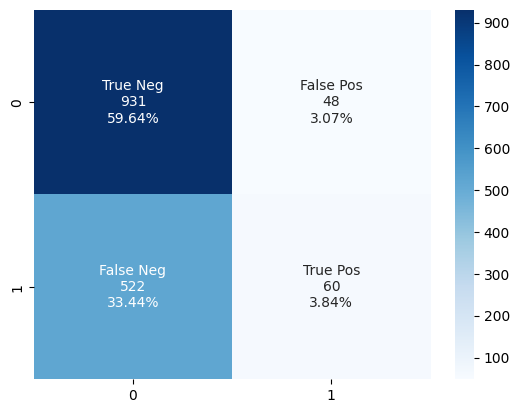

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

## Prediction_interval





In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
np.set_printoptions(formatter={'float': lambda x: "{:.4f}".format(x)})
pd.options.display.float_format = "{:.4f}".format
from scipy.stats import t
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None #show all columns in data

Optimization terminated successfully.
         Current function value: 0.647436
         Iterations 5


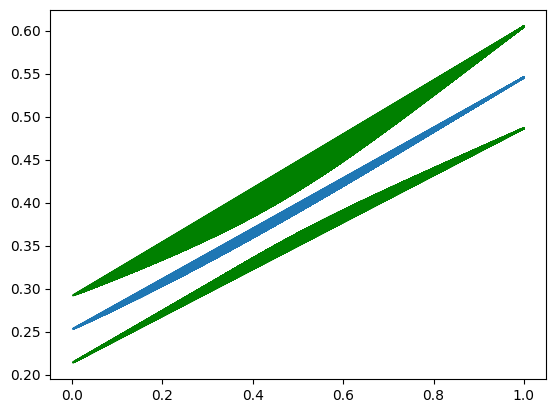

In [ ]:
# Consider the sratio only
x1 = x_test['sratio'].values
y1 = y_test.values

# estimate the model
X = sm.add_constant(x1)
model = sm.Logit(y1, X).fit()
proba = model.predict(X) # predicted probability

# estimate confidence interval for predicted probabilities
cov = model.cov_params()

gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])

c = 1.96 # multiplier for confidence interval
upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(x1, proba)
plt.plot(x1, lower, color='g')
plt.plot(x1, upper, color='g')
plt.show()